# Notebook de apresentação de alguns conceitos sobre preparação de dados
Este notebook tem por base os dados e os notebooks:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes

Este notebook tal como anterior apresenta somente alguns exemplos do que é possível fazer com Python.

## Data Preparation

In [1]:
#Importar algumas das bibliotecas que são necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/diabetes.csv')
#df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()
#Como é possível ver no resultado deste comando temos 9 colunas em que 8 são variáveis independentes (caracteristicas/features) e 1 (Outcome) a variável dependente (alvo/target)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Quantas linhas (obervações) e colunas tem o dataset
df.shape

(768, 9)

In [4]:
#Estatisticas sobre os dados das colunas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.rename({'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness':'ST'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning

Nesta secção olhamos para os dados à procura de situações que não façam sentido e tenham de ser corrigidas, como missing values, valores que não fazem sentido (ex. glucose não pode ser igual a 0), deteção de outliers, etc.

### Missing Values

In [6]:
#Apos correr o comando abaixo é possível verificar que não existem missing values. Caso existissem poderíamos optar pelas seguintes situações:
#Eliminação de todos os valores em falta (dropna)
#Substituição de valores em falta pela mediana/média de colunas contínuas (fillna)
#Utilizar a média para dados centrados e a mediana caso contrário
#Substituição de valores em falta pelo moda para colunas categóricas (fillna)
#Interpolar valores (interpolate)
#Poderão também ser corridos algoritmos para determinar quais as melhores opções de susbtituição dos valores
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
#https://scikit-learn.org/stable/modules/impute.html
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
ST,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


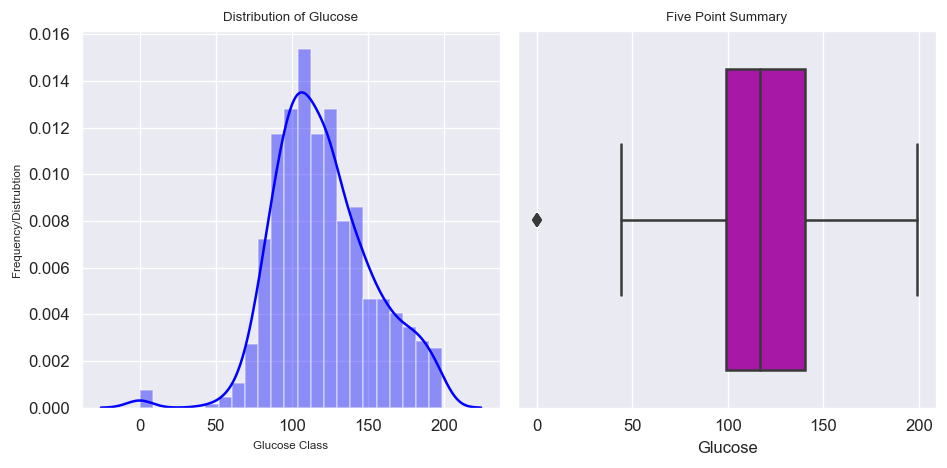

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()
plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

### Valores que não fazem sentido

Há várias opções para corrigir esta situação, por exemplo, eliminar os registos que contêm zero, como foi feito no notebook anterior, ou dado que a distribuição é normal, podemos substituir os valores zero pela média. Vamos optar por esta segundo opção embora uma análise mais cuidada possa invalidar tal hipótese.

In [8]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
#a mesma situação - se quiserem mostrar o gráfico utilizem o código do gráfico anterior
df.BP = df.BP.replace(0,df.BP.median())
df.ST = df.ST.replace(0,df.ST.mean())
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.Insulin = df.Insulin.replace(0,df.Insulin.median())

### Outliers

Apos eliminados os valores 0 nas variáveis em que não faz sentido passamos à deteção dos outliers (estes 0s antes da sua subtituição também eram outliers)

<AxesSubplot:>

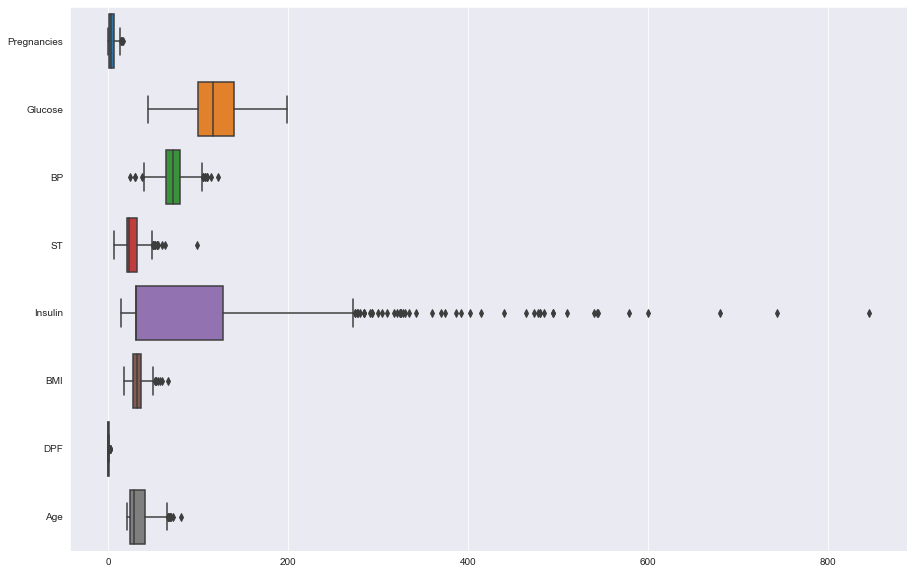

In [9]:
#Detecao de outliers - os gráficos bloxplot (caixa de bigodes) permitem identifcar os outliers
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 10]
sns.boxplot(data=df.loc[:,df.columns!='Outcome'],orient="h")
#Os outliers são os valores que aparecem como pontos

Existem várias formas de tratar os outliers e mesmo utilizando essas diferentes formas é preciso ter cuidado, pois podem eixistir
outliers que não o são.

Uma forma commumente utilizada é a eliminação dos valores que estão a mais de 3 std da média (Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used).

<AxesSubplot:>

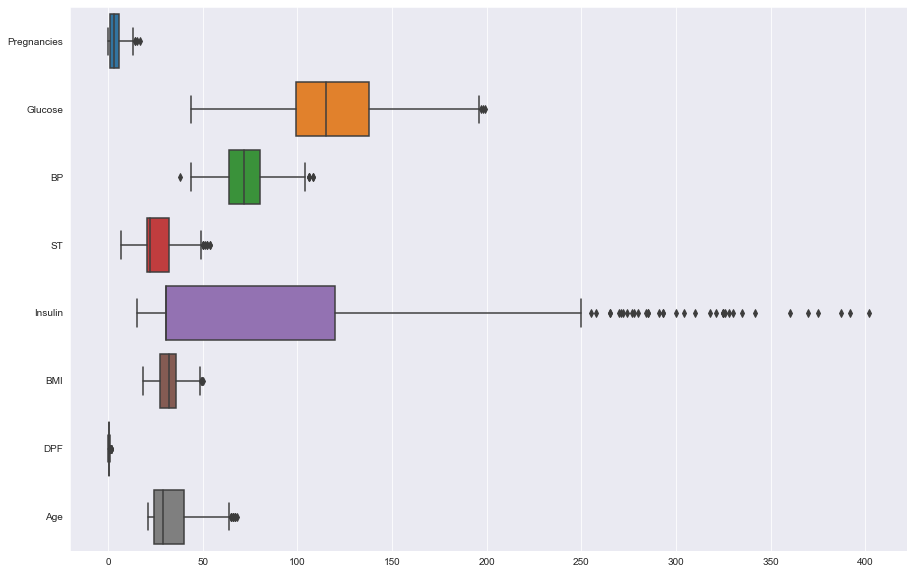

In [10]:
#Método para eliminar os valores que estão acima de 3 std para as diferentes colunas
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df


#Olhando para os bloxplots vamos correr a função anteriormente definida em algumas colunas e voltar a mostrar os boxplots
df = std_based("BP",df)
df = std_based("ST",df)
df = std_based("Insulin",df)
df = std_based("BMI",df)
df = std_based('DPF',df)
df = std_based('Age',df)
plt.rcParams["figure.figsize"] = [15, 10]
sns.boxplot(data=df.loc[:,df.columns!='Outcome'],orient="h")